In [34]:
import sympy as smp
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

In [17]:
m, k, t = smp.symbols('m k t', real=True)
x = smp.symbols('x', cls=smp.Function)
x=x(t)
dxdt = smp.diff(x)

In [20]:
# lagrangian construct
T = smp.Rational(1/2) * m * dxdt**2
V = smp.Rational(1/2) * k * x**2

L = T - V

In [23]:
# Euler - lagrangian
ans = smp.diff(smp.diff(L,dxdt),t) - smp.diff(L,x)
ans

In [37]:
sols = smp.solve([ans], smp.diff(x,t,t))
sol = sols[smp.diff(x,t,t)]
sol

-k*x(t)/m

In [36]:
dzdt_f = smp.lambdify((t,m,k), sol)
dxdt_f = smp.lambdify(dxdt, dxdt)

In [61]:
def func(S, t, m, k):
    x, z = S
    return [z, -k*x/m]

x0 = 1
z0 = 0
s0 = (x0, z0)

In [62]:
t = np.linspace(0,20,1000)
m = 1
k = 2
odesol = odeint(func, s0, t, args=(m ,k))

In [63]:
x,z = odesol.T

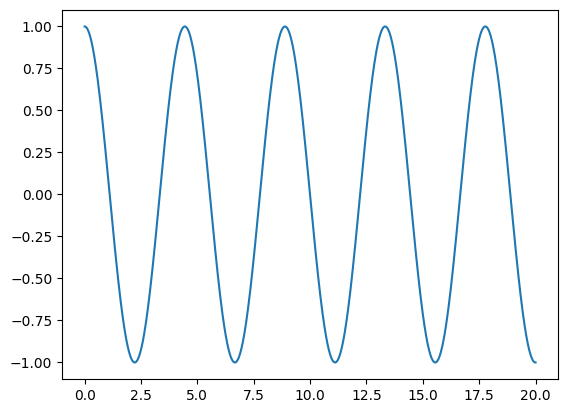

In [64]:
plt.plot(t,x)